## Final Project Submission

Please fill out:
* Student name: Kelvin Waters
* Student pace: online-ds-ft-012120
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: [Housing price prediction modeling utilizing multivariate linear regression.](https://medium.com/p/9bd48bdf40b5/)


### Objective
This project entails utilizing the kc_house_data set to predict housing prices making use of a multivariate linear regression model. The initial dataset consists well over twenty-thousand rows spanding twenty-one columns at approx: 3.5MB. The price is the dependant variable and is the targeted prediction in this notebook, the features are the independent variables. The columns and descriptions in the dataset are as follows:
* id - a notation for a house
* date - date house was sold
* price - price is prediction target
* bedrooms - number of bedrooms/house
* bathrooms - number of bathrooms/house
* sqft_living - square footage of the home
* sqft_loft - square footage of the lot
* floors - total floors (levels) in the house
* waterfront - house which has a view to a waterfront
* view - has been viewed
* condition - how good the condition is overall(1-5 scale, 5 being excellent)
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of the house apart from the basement
* sqft_basement - square footage of the basement
* yr_built - year house was constructed

Exploratory data analysis (EDA) questions addressed in this notebook are as follows:
1. *What independant variables are being considered categorical and why?*
2. *How and which dtypes values are being prepped for modeling?*
3. *Which, if any, independant variables were considered highly correlated and how was it handled?*

> This notebook will be following the **OSEMIN** processing model and is documented accordingly

<img src="images/new_osemn.png" width=600>


Three coeffs findings and answers: bedrooms, sqft_living, and price_per_sqft independent variables. 

In [2]:
import numpy as np
import pandas as pd 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline

import calendar

import seaborn as sns

#import statsmodels.formula.api as sm
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
# truncated results begone! 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# displays all cell outputs, not limited to just the last code line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Obtain
Initial loading of the data set

In [5]:
# importing the data set 
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Taking note of the original shape of the data set

In [6]:
data.shape

(21597, 21)

In [7]:
# decided to dropna, didn't find much difference in prediction results
# and maintaining NaN's plus Error in post modeling steps! 
# MissingDataError: exog contains inf or nans
data.dropna(inplace=True)

In [8]:
# rechecking data shape again
data.shape

(15762, 21)

In [9]:
# No NaN's 
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Basic info of the columns and data types

In [10]:
# taking note of the various data types
# object types date, yr_renovated may be changed to date_time dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

Simple glance and values of each column

In [11]:
# viewing each column as a str object 
for col in data.columns:
    try:
        print(col, data[col].value_counts()[:5])
    except:
        print(col, data[col].value_counts())
        
    print('\n') 

id 6632900574    2
9353300600    2
5101402435    2
722039087     2
1523049207    2
Name: id, dtype: int64


date 6/25/2014    103
6/23/2014    102
7/14/2014     93
4/28/2015     93
7/8/2014      93
Name: date, dtype: int64


price 350000.0    129
450000.0    120
500000.0    115
550000.0    113
425000.0    111
           ... 
275053.0      1
763101.0      1
438900.0      1
959750.0      1
311300.0      1
Name: price, Length: 3034, dtype: int64


bedrooms 3    7120
4    5079
2    2003
5    1183
6     192
Name: bedrooms, dtype: int64


bathrooms 2.50    4004
1.00    2761
1.75    2226
2.25    1487
2.00    1395
1.50    1060
2.75     853
3.00     543
3.50     543
3.25     428
3.75     104
4.00     100
4.50      75
4.25      62
0.75      50
4.75      17
5.00      14
Name: bathrooms, dtype: int64


sqft_living 1820    102
1440    100
1400     97
1300     95
1320     94
Name: sqft_living, dtype: int64


sqft_lot 5000    277
6000    204
4000    177
7200    151
4800     89
Name: sqft_lot, dtype: 

Text(0.5, 0, 'Price')

Text(0, 0.5, 'zipcode')

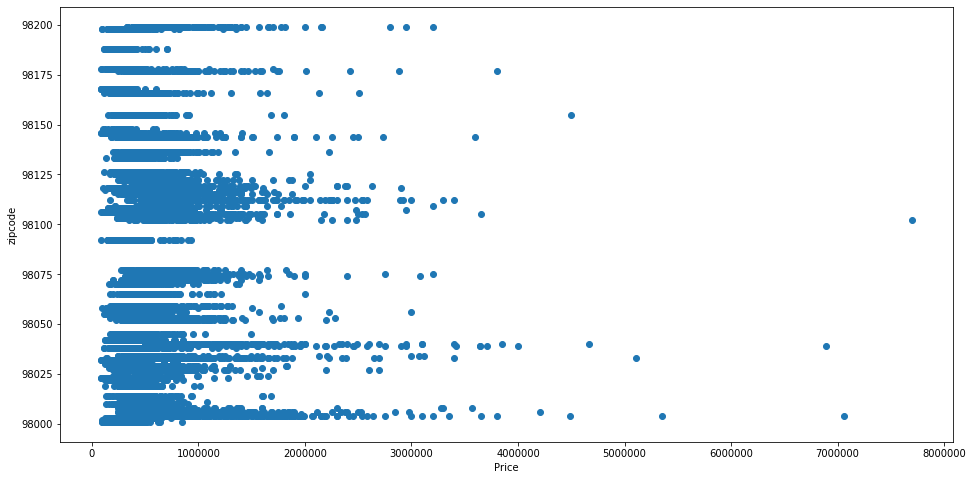

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data.price, data.zipcode)
ax.set_xlabel('Price')
ax.set_ylabel('zipcode')
plt.show()

Attempt to filter data by z-score

In [13]:
z = np.abs(stats.zscore(data.price))
print(z)

[0.00891201 0.16840532 0.08413755 ... 0.37966644 0.37402184 0.58116341]


In [14]:
threshold = 3
print(np.where (z > 3))

(array([   16,   112,   186,   211,   225,   233,   388,   403,   485,
         577,   600,   761,   860,   861,   905,   948,  1011,  1052,
        1065,  1076,  1228,  1267,  1291,  1425,  1426,  1526,  1567,
        1612,  1659,  1785,  1806,  1912,  2091,  2094,  2120,  2167,
        2200,  2348,  2388,  2433,  2463,  2558,  2717,  2726,  2733,
        2800,  2835,  2912,  2915,  2999,  3035,  3146,  3200,  3212,
        3253,  3374,  3465,  3501,  3542,  3593,  3960,  3974,  3976,
        4071,  4077,  4152,  4233,  4234,  4272,  4335,  4389,  4493,
        4521,  4600,  4650,  4726,  4732,  4869,  4886,  4905,  4927,
        4937,  4945,  5093,  5117,  5184,  5236,  5287,  5331,  5333,
        5386,  5404,  5419,  5473,  5528,  5579,  5762,  5813,  5855,
        5888,  5989,  6067,  6285,  6398,  6496,  6688,  6748,  6749,
        6802,  6895,  6922,  6984,  7060,  7179,  7211,  7353,  7572,
        7626,  7641,  7643,  7687,  7695,  7898,  7966,  8085,  8111,
        8205,  8212

In [15]:
# limiting any z-scores > 3
data_z = data[(z < 3)] 

In [16]:
# 282 rows difference
data.shape
data_z.shape

(15762, 21)

(15480, 21)

In [17]:
data_z.price.describe()

count    1.548000e+04
mean     5.084310e+05
std      2.615181e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.490000e+05
75%      6.275000e+05
max      1.650000e+06
Name: price, dtype: float64

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Zipcode')

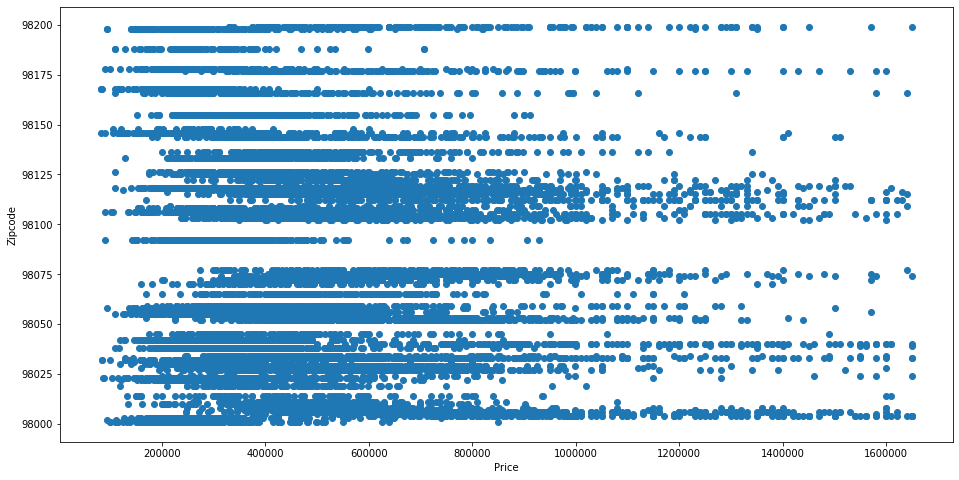

In [18]:
# better results achieved
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_z.price, data_z.zipcode)
ax.set_xlabel('Price')
ax.set_ylabel('Zipcode')
plt.show()

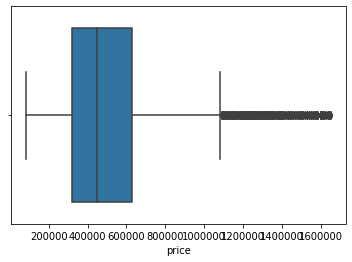

In [19]:
sns.boxplot(data_z.price)

### How were possible outliers delt with?

In [20]:
# IRQ for each column
Q1 = data_z.quantile(0.25) # lower
Q3 = data_z.quantile(0.75) # upper
IQR = Q3 - Q1
print(IQR)

id               5.207564e+09
price            3.075000e+05
bedrooms         1.000000e+00
bathrooms        1.000000e+00
sqft_living      1.090000e+03
sqft_lot         5.487250e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       9.800000e+02
yr_built         4.400000e+01
yr_renovated     0.000000e+00
zipcode          8.400000e+01
lat              2.127250e-01
long             2.060000e-01
sqft_living15    8.500000e+02
sqft_lot15       4.914500e+03
dtype: float64


In [21]:
# narrowing down any outliers via IQR
# faint attempt to keep as much normalized as plausible
data_z = data_z[~((data_z < (Q1 - 1.5 * IQR)) |(data_z > (Q3 + 1.5 * IQR))).any(axis=1)]
data_z.shape

(10929, 21)

In [22]:
data_z.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.092900e+04,1.092900e+04,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.0,10929.0,10929.000000,10929.000000,10929.000000,10929.000000,10929.0,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000
mean,4.735892e+09,4.384576e+05,3.271846,1.984559,1820.830451,6974.704365,1.470034,0.0,0.0,3.423186,7.383384,1585.493183,1971.727148,0.0,98079.489523,47.557951,-122.230515,1797.440937,6861.182908
std,2.852867e+09,1.787125e+05,0.776517,0.649824,618.249247,3334.120908,0.546555,0.0,0.0,0.650892,0.804318,597.033490,29.247393,0.0,53.462815,0.141964,0.123307,503.434128,2968.132641
min,2.800031e+06,8.200000e+04,2.000000,0.500000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,1900.000000,0.0,98001.000000,47.177500,-122.472000,620.000000,659.000000
25%,2.329800e+09,3.000000e+05,3.000000,1.500000,1350.000000,4700.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,1953.000000,0.0,98033.000000,47.456900,-122.333000,1430.000000,4800.000000
50%,4.038000e+09,4.050000e+05,3.000000,2.000000,1750.000000,7020.000000,1.000000,0.0,0.0,3.000000,7.000000,1440.000000,1974.000000,0.0,98065.000000,47.568900,-122.263000,1710.000000,7149.000000
75%,7.454001e+09,5.490000e+05,4.000000,2.500000,2220.000000,8900.000000,2.000000,0.0,0.0,4.000000,8.000000,1920.000000,1999.000000,0.0,98118.000000,47.682700,-122.154000,2100.000000,8640.000000
max,9.895000e+09,1.080000e+06,5.000000,4.000000,4060.000000,18730.000000,3.500000,0.0,0.0,5.000000,9.000000,3640.000000,2015.000000,0.0,98199.000000,47.777600,-121.818000,3610.000000,17334.000000


In [23]:
data_z.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dropping unnecessary variables not affecting the target variable price

### Scrub & Clean

In [24]:
# creating dummy categorial variables
view_dummies = pd.get_dummies(data['view'], drop_first=True)
waterfront_dummies = pd.get_dummies(data['waterfront'], drop_first=True)
zipcode_dummies = pd.get_dummies(data['zipcode'], drop_first=True)

data_z = data.drop(['view', 'waterfront', 'zipcode'], axis=1)

data_z = pd.concat([data, view_dummies, waterfront_dummies, zipcode_dummies], axis=1)
data_z.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1.0,2.0,3.0,4.0,1.0,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# let the scrubbing begin!
data_scrub = data_z.drop(['id', 'lat', 'long', 'date', 'sqft_above', 
                          'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis= 1)

### How were NaN, null, or immiscible values being handled?

> Below grade spaces (basements, dens, etc.) do not usually count toward a home's square footage. 
> Even a finished basement can't be counted toward a home's Gross Living Area (GLA) but it can be noted 
> separately in the listings total area. ... Stairways and closet areas are included in the square footage length.

<img src="images/redfin.png">
%%html
<a href="https://www.redfin.com/blog/how-to-calculate-the-square-footage-of-your-home/">How to calculate the sqft of your home</a>

In [26]:
# sqft_basement to categorical yes -1 , no - 0
# having a 'finished' basement will influence the target model price
# this data set doesn't differiate if the basement is considered a finished basement, like a home movie theatre/ gameroom
# the majority (> 12k) of values is listed as 0.0, assuming no basement another 454 values have '?'
data_z['sqft_basement'] = data_z['sqft_basement'].replace('?', '0')
data_z['sqft_basement'] = data_z['sqft_basement'].astype(float).astype(int)

### What additional features were added that weren't present in the original data set?

|-----------------------||OLS Regression Results WITHOUT price_per_sqft||-----------------                   
|:----------------------||:---------------------:||----------------:|
|Dep. Variable           |price                  |R-Squared:        |0.612
|Model:                  |OLS                    |Adj. R-Squared    |0.612
|Method:                 |Least Squares          |F-stastic:        |1.114e+04
|Date:                   |Monday                 |Prob (F-statistic)|0.00
|Time:                   |12:23:53               |Log-Likelihood:   |-14900
|No. Observation         |15762                  |AIC:              |2.982e+04
|Df Residuals:           |15682                  |BIC:              |2.991e+04
|Df Model:               |79                  
|Covariance Type:        |nonrobust  
|Omnibus:                |15681.994              |Durbin-Watson:    |1.974
|Prob(Omnibus):          |0.000                  |Jarque-Bera (JB): |785829.041
|Skew:                   |3.027                  |Prob(JB):         |0.00
|Kurtosis:               |37.057                 |Cond. No.         |4.46

In [27]:
# adding price_per_sqft to features
data_scrub['price_per_sqft'] = data_z['price'] / data_z['sqft_living']

In [28]:
data_scrub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 1.0, 2.0, 3.0, 4.0, 1.0, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199, 'price_per_sqft'], dtype='object')

Descriptive statistics for the dataset. 

In [29]:
data_scrub.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,1.0,2.0,3.0,4.0,1.0,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,price_per_sqft
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1971.111217,82.440236,98077.558241,0.015544,0.043649,0.022078,0.015226,0.007613,0.009453,0.013767,0.014656,0.008184,0.022903,0.006408,0.013577,0.004441,0.008819,0.005900,0.008121,0.010849,0.023347,0.003680,0.019350,0.013387,0.015797,0.011801,0.012879,0.006281,0.020112,0.025124,0.027725,0.002284,0.013006,0.025885,0.010278,0.026393,0.018716,0.012625,0.019223,0.020619,0.020810,0.014148,0.005646,0.012879,0.019414,0.017193,0.009834,0.016495,0.004124,0.026964,0.010976,0.014846,0.013323,0.008501,0.004822,0.013196,0.025822,0.015861,0.025568,0.023347,0.008501,0.013260,0.018843,0.015988,0.021952,0.012372,0.016559,0.013577,0.002665,0.019794,0.011737,0.012245,0.011864,0.011991,0.006154,0.012943,0.014021,263.793645
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,29.336823,397.212626,53.414906,0.123706,0.204320,0.146943,0.122457,0.086924,0.096770,0.116527,0.120173,0.090099,0.149600,0.079794,0.115730,0.066495,0.093496,0.076589,0.089752,0.103595,0.151009,0.060551,0.137757,0.114927,0.124695,0.107991,0.112756,0.079006,0.140387,0.156506,0.164189,0.047738,0.113303,0.158797,0.100861,0.160305,0.135524,0.111654,0.137314,0.142110,0.142751,0.118104,0.074933,0.112756,0.137979,0.129995,0.098680,0.127375,0.064087,0.161982,0.104192,0.120939,0.114658,0.091814,0.069273,0.114118,0.158608,0.124941,0.157847,0.151009,0.091814,0.114389,0.135974,0.125432,0.146530,0.110541,0.127615,0.115730,0.051553,0.139298,0.107704,0.109979,0.108277,0.108848,0.078208,0.113030,0.117581,109.503757
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [30]:
data_scrub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           15762 non-null  float64
 1   bedrooms        15762 non-null  int64  
 2   bathrooms       15762 non-null  float64
 3   sqft_living     15762 non-null  int64  
 4   sqft_lot        15762 non-null  int64  
 5   floors          15762 non-null  float64
 6   waterfront      15762 non-null  float64
 7   view            15762 non-null  float64
 8   condition       15762 non-null  int64  
 9   grade           15762 non-null  int64  
 10  yr_built        15762 non-null  int64  
 11  yr_renovated    15762 non-null  float64
 12  zipcode         15762 non-null  int64  
 13  1.0             15762 non-null  uint8  
 14  2.0             15762 non-null  uint8  
 15  3.0             15762 non-null  uint8  
 16  4.0             15762 non-null  uint8  
 17  1.0             15762 non-null 

Converting calendar events to_datetime object

In [31]:
# yr_renovated, yr_built
data_scrub['yr_renovated'] = pd.to_datetime(data['yr_renovated'])
data_scrub['yr_built'] = pd.to_datetime(data['yr_built'])

Checking correlation of the data set

In [32]:
data_scrub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 1.0, 2.0, 3.0, 4.0, 1.0, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199, 'price_per_sqft'], dtype='object')

In [33]:
# correlation of the features
# questioning if any of these features are dependent on another feature
independant_variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                         'floors', 'waterfront', 'view', 'condition', 'grade', 
                         'yr_built', 'yr_renovated', 'zipcode']
data[independant_variables].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
price,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.274212,0.396862,0.034367,0.664146,0.049345,0.122731,-0.049502
bedrooms,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,-0.005833,0.080577,0.020074,0.354243,0.153229,0.017430,-0.147255
bathrooms,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.065688,0.180923,-0.130287,0.664748,0.504841,0.046988,-0.199625
sqft_living,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.111491,0.285506,-0.062319,0.764251,0.314220,0.050232,-0.196537
sqft_lot,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.025982,0.077073,-0.016036,0.108950,0.051578,0.002147,-0.129494
floors,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,0.018382,0.027518,-0.261013,0.459843,0.487052,-0.000720,-0.058130
waterfront,0.274212,-0.005833,0.065688,0.111491,0.025982,0.018382,1.000000,0.409773,0.016454,0.083034,-0.024068,0.087800,0.030391
view,0.396862,0.080577,0.180923,0.285506,0.077073,0.027518,0.409773,1.000000,0.046354,0.248679,-0.056645,0.098386,0.086479
condition,0.034367,0.020074,-0.130287,-0.062319,-0.016036,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.366938,-0.060845,0.001685
grade,0.664146,0.354243,0.664748,0.764251,0.108950,0.459843,0.083034,0.248679,-0.147810,1.000000,0.443286,0.011795,-0.184120


Checking for multicollinearity via masked heatmap

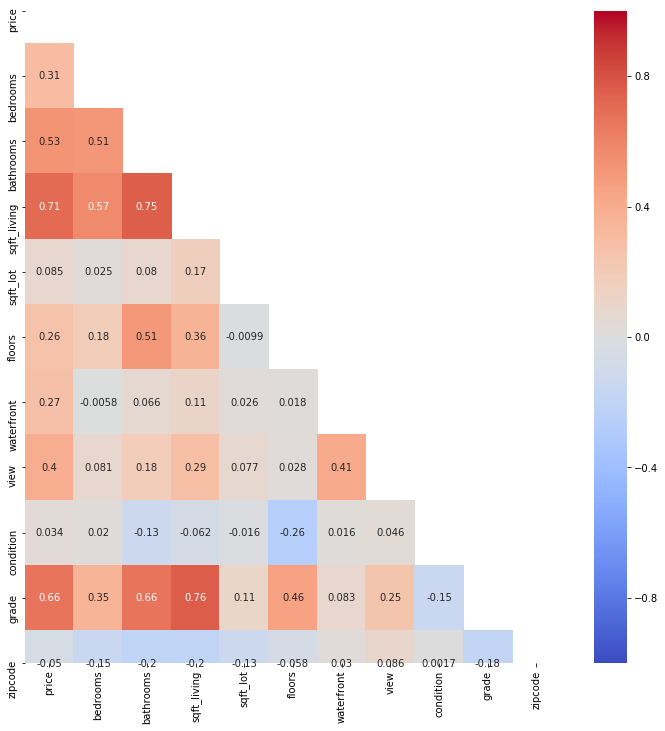

In [34]:
# correlation map without the duplicated data via mask
# look good the sqft_above indicates a correlation with an indentical metric
# sqft_living, which measures the living area above the grade/basement. 

"""multicollinearity is a relationship between 3 or more variables while correlation
simply investigates the relationship between two variables."""

corr = data_scrub[independant_variables].corr()

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True, mask = mask);

Normalizing data (scaling values)

|-----------------------||OLS Regression Results normalized features||-----------------                   
|:----------------------||:---------------------:||----------------:|
|Dep. Variable           |price                  |R-Squared:        |0.805
|Model:                  |OLS                    |Adj. R-Squared    |0.804
|Method:                 |Least Squares          |F-stastic:        |818.1
|Date:                   |Monday                 |Prob (F-statistic)|0.00
|Time:                   |12:23:53               |Log-Likelihood:   |-2.1167e+05
|No. Observation         |15762                  |AIC:              |4.235e+05
|Df Residuals:           |15682                  |BIC:              |4.241e+05
|Df Model:               |79                  
|Covariance Type:        |nonrobust             
|Omnibus:                |15875.623              |Durbin-Watson:    |1.992
|Prob(Omnibus):          |0.000                  |Jarque-Bera (JB): |3694232.681
|Skew:                   |4.457                  |Prob(JB):         |0.00
|Kurtosis:               |77.469                 |Cond. No.         |5.97e+15

The normalization of the target/dependent variable (price) seems to help Homoscedasticity

In [35]:
def normalize_features(columns):
    return (columns - columns.mean()) / columns.std()
for features in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                         'floors', 'waterfront', 'view', 'condition', 'grade', 
                 'zipcode']:
    data_scrub[features] = normalize_features(data_scrub[features])

Saving cleaned dataset as csv file. Date_time objects ommited and sqft_basement values '?' changed to 0

In [36]:
data_scrub.to_csv('data_set_cleaned.csv', index=False)

Checking again for missing values

In [37]:
data_scrub.price_per_sqft.describe()

count    15762.000000
mean       263.793645
std        109.503757
min         87.588235
25%        181.776860
50%        244.680851
75%        318.514873
max        798.122066
Name: price_per_sqft, dtype: float64

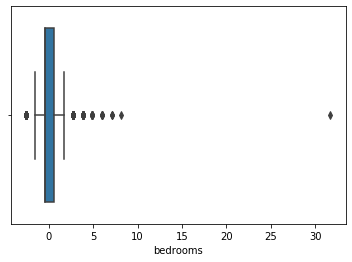

In [38]:
# 33 bedrooms! 
sns.boxplot(data_scrub.bedrooms)

In [39]:
# potential outliars 33 bedrooms and 1.75 baths in a 1620sqft living space sounds implausible
data_scrub[data_scrub.bedrooms > 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,1.0,2.0,3.0,4.0,1.0,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,price_per_sqft
8748,-0.057269,8.148232,1.146630,0.996593,-0.246775,0.936038,-0.087585,-0.302083,-0.630194,-0.566223,1970-01-01 00:00:00.000001918,1970-01-01 00:00:00.000001999,0.532469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173.333333
13301,1.635251,7.079058,4.081011,2.727454,-0.104269,-0.918040,-0.087585,2.324918,-0.630194,1.139915,1970-01-01 00:00:00.000002008,1970-01-01 00:00:00.000000000,-1.377111,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250.544662
15147,0.291981,7.079058,-0.157540,1.660634,-0.080502,0.936038,-0.087585,-0.302083,0.903641,-0.566223,1970-01-01 00:00:00.000001958,1970-01-01 00:00:00.000000000,-1.339668,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180.055402
15856,0.265115,31.670070,-0.483582,-0.505665,-0.221908,-0.918040,-0.087585,-0.302083,2.437475,-0.566223,1970-01-01 00:00:00.000001947,1970-01-01 00:00:00.000000000,0.476304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,395.061728
19239,0.318846,7.079058,1.146630,0.909505,-0.275826,0.936038,-0.087585,-0.302083,0.903641,-0.566223,1970-01-01 00:00:00.000001913,1970-01-01 00:00:00.000000000,0.513747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226.027397


In [40]:
# faint attempt to reduce bedrooms p>|t| below 0.087
#data_scrub.drop(data_scrub[data_scrub['bedrooms'] > 7].index, inplace=True)
# this increased p>|t| to 0.135!

In [41]:
data_scrub.bedrooms.unique()

array([-0.40516298,  0.66401145, -1.47433741,  1.73318588, -2.54351184,
        2.80236031,  3.87153475,  4.94070918,  6.00988361,  8.14823247,
        7.07905804, 31.67006995])

In [42]:
data_scrub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 1.0, 2.0, 3.0, 4.0, 1.0, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199, 'price_per_sqft'], dtype='object')

### Explore

Concern that outliers could exist here, like a 2BR price comparision of a larger 3BR for the same general area, although this would not be unheard of. 

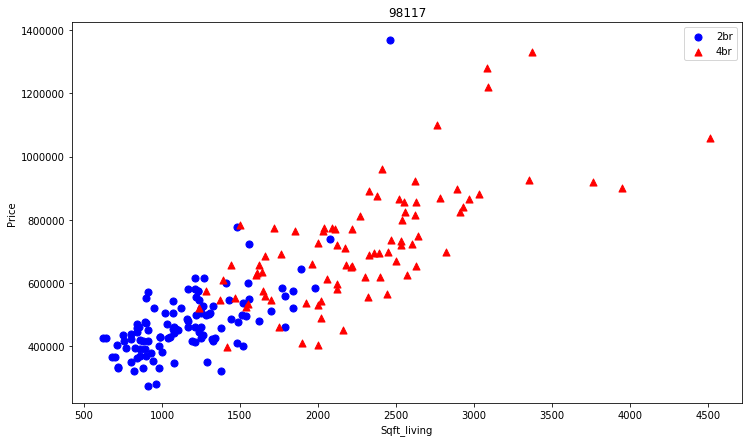

In [43]:
# comparing price between home size 
# some outliers indicate that some 2br dwellings are more expensive than 5br's in the same zipcode and sqft. 

def scatter(df, zipcode):
    bed_a = data[(data.zipcode == zipcode) & (data.bedrooms == 2)] 
    bed_b = data[(data.zipcode == zipcode) & (data.bedrooms == 4)]
    
    plt.rcParams['figure.figsize'] = (12,7)
    plt.scatter(bed_a.sqft_living, bed_a.price, color = 'b', label = '2br', s= 50)
    plt.scatter(bed_b.sqft_living, bed_b.price, marker= '^', color = 'r', label = '4br', s= 50)

    plt.xlabel('Sqft_living')
    plt.ylabel('Price')
    plt.title(zipcode)
    plt.legend()

scatter(data_scrub, 98117)

In [44]:
# property count by zip codes
zipcode_stats = data.groupby('zipcode')['zipcode'].agg('count').sort_values(ascending= False)
zipcode_stats

zipcode
98038    437
98103    425
98052    416
98042    408
98115    407
98117    403
98034    396
98118    368
98023    368
98006    361
98133    346
98059    328
98058    325
98033    317
98155    312
98074    306
98027    305
98056    303
98125    297
98053    295
98075    271
98144    261
98092    260
98001    255
98126    252
98116    250
98029    249
98106    234
98004    231
98065    223
98199    221
98003    217
98008    214
98146    214
98028    211
98107    210
98122    209
98112    208
98040    205
98198    204
98031    203
98072    203
98055    199
98136    195
98168    193
98178    189
98177    187
98030    186
98166    185
98105    173
98022    171
98045    162
98077    155
98002    149
98011    139
98119    134
98108    134
98005    129
98019    128
98007    101
98032     99
98188     97
98014     93
98070     89
98109     76
98010     70
98102     65
98024     58
98148     42
98039     36
Name: zipcode, dtype: int64

<Figure size 864x504 with 0 Axes>

(array([2371., 4587., 4132., 2360., 1239.,  536.,  279.,  142.,   82.,
          34.]), array([ 87.58823529, 158.64161834, 229.69500138, 300.74838442,
        371.80176747, 442.85515051, 513.90853355, 584.9619166 ,
        656.01529964, 727.06868268, 798.12206573]), <a list of 10 Patch objects>)

Text(0.5, 0, 'Price per sqft')

Text(0, 0.5, 'count')

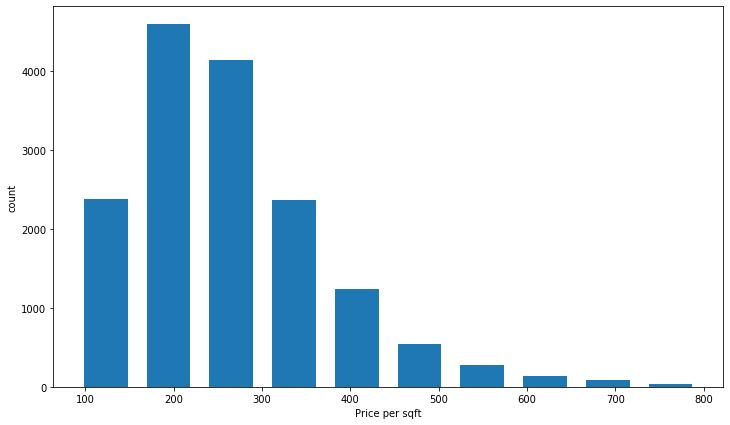

In [45]:
# normalized as normal can be
plt.figure(figsize=(12,7))
plt.hist(data_scrub.price_per_sqft, rwidth=0.7)
plt.xlabel('Price per sqft')
plt.ylabel('count')

### Model

In [46]:
# Define the problem
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
'floors', 'waterfront', 'view', 'condition', 'grade', 'price_per_sqft', 'zipcode']

Log Transformations

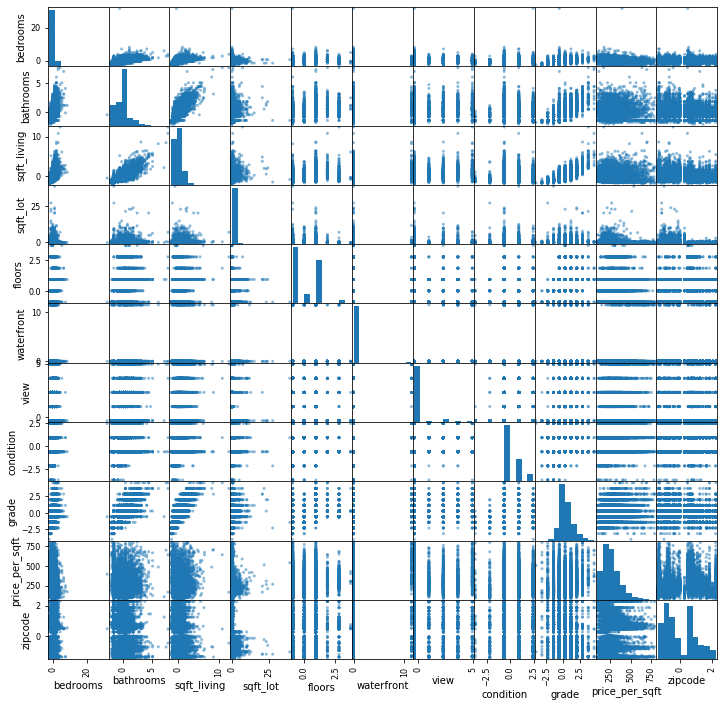

In [47]:
# feature scatter matrix minus dummies
pd.plotting.scatter_matrix(data_scrub[x_cols], figsize=(12,12));

In [48]:
# non_normal = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
# 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'price_per_sqft']

# for feat in non_normal:
#     data_scrub[feat] = data_scrub[feat].map(lambda x: np.log(x))
# pd.plotting.scatter_matrix(data_scrub[x_cols], figsize=(10,12));

Preprocessing

In [49]:
# preprocessing 
# date_time errors, every col with dtype date_time removed
#data_scrub.columns = [col.replace(' ', '_') for col in data_scrub.columns]

for col in x_cols:
    data_scrub[col] = (data_scrub[col] - data_scrub[col].mean()) / data_scrub[col].std()
    
data_scrub.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,1.0,2.0,3.0,4.0,1.0,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,price_per_sqft
1,-0.008912,-0.405163,0.168503,0.528498,-0.192211,0.936038,-0.087585,-0.302083,-0.630194,-0.566223,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,0.888175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.497290
3,0.168400,0.664011,1.146630,-0.135543,-0.245818,-0.918040,-0.087585,-0.302083,2.437475,-0.566223,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,1.094110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.405188
4,-0.084135,-0.405163,-0.157540,-0.440349,-0.172174,-0.918040,-0.087585,-0.302083,-0.630194,0.286846,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,-0.066615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.363255
5,1.850175,0.664011,3.102884,3.630986,2.071813,-0.918040,-0.087585,-0.302083,-0.630194,2.846052,1970-01-01 00:00:00.000002001,1970-01-01 00:00:00.000000000,-0.459764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.336576
6,-0.762486,-0.405163,0.168503,-0.402248,-0.202325,0.936038,-0.087585,-0.302083,-0.630194,-0.566223,1970-01-01 00:00:00.000001995,1970-01-01 00:00:00.000000000,-1.395832,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.037845


Fitting the actual model

In [50]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data_scrub).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.114e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:53:32   Log-Likelihood:                -5243.0
No. Observations:               15762   AIC:                         1.051e+04
Df Residuals:                   15750   BIC:                         1.060e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.602e-17      0.003  -9.68e-15      1.000      -0.005       0.005
bedrooms          -0.0059      0.003     -1.711      0.087      -0.013       0.001
bathrooms          0.0298      0.005      6.541      0.000       0.021       0.039
sqft_living        0.7086      0.006    127.884      0.000       0.698       0.719
sqft_lot          -0.0244      0.003     -8.840      0.000      -0.030      -0.019
floors            -0.0258      0.003     -7.773      0.000      -0.032      -0.019
waterfront         0.0660      0.003     22.151      0.000       0.060       0.072
view               0.0242      0.003      7.638      0.000       0.018       0.030
condition          0.0157      0.003      5.537      0.000       0.010       0.021
grade              0.0350      0.005      7.394      0.000       0.026       0.044
price_per_sqft     0.5929      0.003    194.638      0.000       0.587       0.599
zipcode           -0.0114      0.003     -4.007      0.000      -0.017      -0.006
==============================================================================
Omnibus:                    16477.760   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6856641.677
Skew:                           4.565   Prob(JB):                         0.00
Kurtosis:                     104.769   Cond. No.                         4.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Printable OLS Summary

In [51]:
# save OLS results as txt file
with open('summary.txt', 'w') as st:
    st.write(model.summary().as_text())

2690

In [52]:
X = data_scrub[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6500581838261268),
 ('bathrooms', 2.8798994483022606),
 ('sqft_living', 4.2455439181739525),
 ('sqft_lot', 1.0578230363760481),
 ('floors', 1.519327250629853),
 ('waterfront', 1.227323972322142),
 ('view', 1.383274797020464),
 ('condition', 1.1160704855386752),
 ('grade', 3.1048615515093942),
 ('price_per_sqft', 1.283179109551832),
 ('zipcode', 1.1199317027563422)]

Checking for Normality

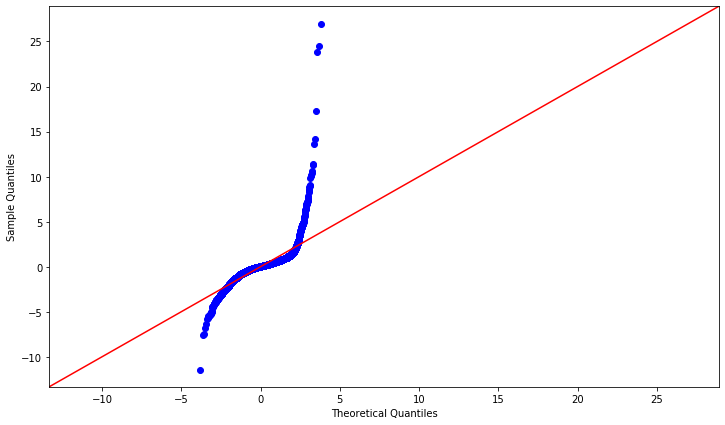

In [53]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit= True)

Checking for Homoscedasticity 

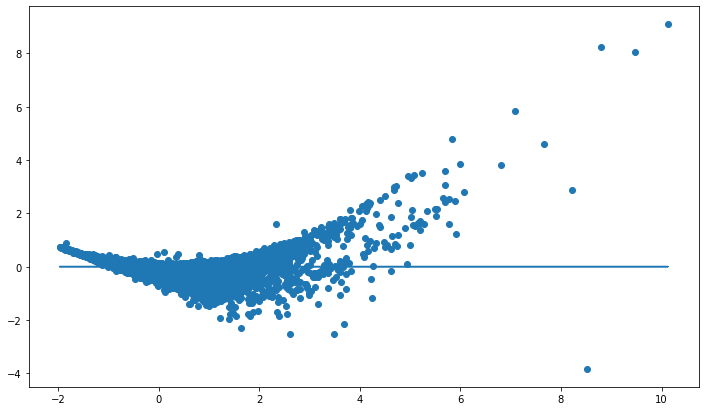

In [54]:
plt.scatter(model.predict(data_scrub[x_cols]), model.resid)
plt.plot(model.predict(data_scrub[x_cols]), [0 for i in range(len(data_scrub))])

Model Refinement

In [55]:
# finding a cutoff point
# final model looks good, may be too good, check of overfitting

Stepwise Regression

In [56]:
# ERROR?! 
"""TypeError: cannot do label indexing on 
<class 'pandas.core.indexes.base.Index'> with these indexers [1.0] of <class 'float'>"""
# changing to int had no affect for both the dependent variable and the independent features! 

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
# backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
X = data_scrub.drop(['price'], axis= 1)
y = pd.DataFrame(data_scrub.price, columns= ['price'])
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

"TypeError: cannot do label indexing on \n<class 'pandas.core.indexes.base.Index'> with these indexers [1.0] of <class 'float'>"

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1.0] of <class 'float'>

Train/Test Split

In [57]:
#TypeError: invalid type promotion
# seems date_time dtypes not allowed
# could have change to total_seconds
data_scrub = data_scrub.drop(['yr_renovated', 'yr_built'], axis= 1)

In [58]:
# the data
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
'floors', 'waterfront', 'view', 'condition', 'grade', 'price_per_sqft', 'zipcode'] 
y = data_scrub.price
df = data_scrub

In [59]:
# create training and testing vars 20%
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= 0.2, random_state=123)
# can use len or shape
print(len(X_train), len(X_test), len(y_train), len(y_test))

12609 3153 12609 3153


Normalize test group apart from your train data

K-Fold cross validation

In [60]:
# StandardScaler object to register and proceed with the Mean and Standard Deviation
# of train set and transform our test group using it.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

predictions[0:5] # first 5 comparisons

array([ 0.18317596,  1.19197213, -0.51935453,  0.82928908, -0.83636638])

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

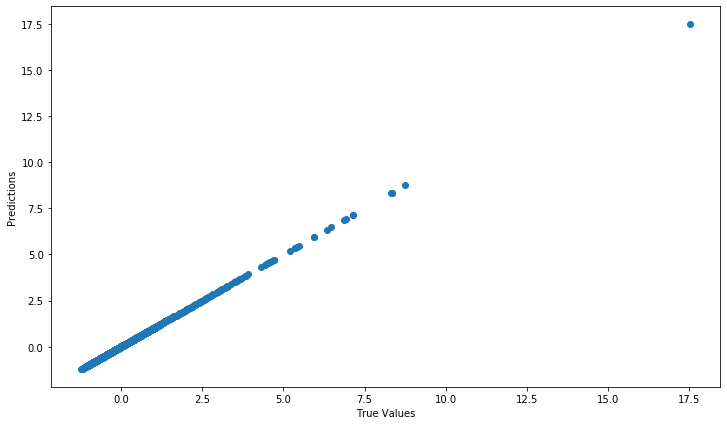

In [62]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [63]:
# score of 1.0, slighty less when bedrooms feature was removed
print('Score:', model.score(X_test, y_test))

Score: 1.0


Comparing Predictions to Dedependent variable

In [1]:
predictions = pd.DataFrame(predictions)

NameError: name 'pd' is not defined

In [2]:
type(predictions)

NameError: name 'predictions' is not defined

In [3]:
predictions.shape

NameError: name 'predictions' is not defined

In [67]:
data_scrub.shape

(15762, 86)

RangeIndex(start=0, stop=1, step=1)

### Interpretation

In [ ]:
"""
The model is a close fit based on the R-squared value (and Adj R-squared) of 0.886 close to 1.0, the 
Adj R-squared value is identical indicating that there are no uselesss features selected in the model and
that no or few penalites are being calculated giving the F-statistic value 1.114e+04 and Prob (F-statistic)
of 0.00, there is no linear relationship between the target variable and the independent variables. The 
subsequent t test (higher the better, see price_per_sqft) and corresponding P value indicate that the null hypothesis
can be rejected. The bedrooms feature has a small t- value and a large p- value which would fail to reject the 
null hypothesis, this feature would not be feasible in making a prediction. All the other features selected would reject 
null hypothesis. 

"""